In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

In [38]:
df_ames_reg_train = df_ames_train[['Overall Qual','Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add', 'Full Bath','SalePrice']]


In [39]:
X = df_ames_reg_train


In [40]:
ohe = OneHotEncoder(sparse=False,  handle_unknown='ignore') 

In [41]:
ohe.fit(X)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [42]:
ohe.transform(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
ohe.get_feature_names_out()

array(['Overall Qual_1', 'Overall Qual_2', 'Overall Qual_3', ...,
       'SalePrice_584500', 'SalePrice_591587', 'SalePrice_611657'],
      dtype=object)

In [44]:
smart_encoder = make_column_transformer(
    (ohe, ['Overall Qual', 'Neighborhood']),
    remainder='passthrough',                 # don't change the rest of the columns
    verbose_feature_names_out=False          # shorten up those names for the columns
)

In [45]:
smart_encoder.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Overall Qual', 'Neighborhood'])],
                  verbose_feature_names_out=False)

In [46]:
X_train_encoded = smart_encoder.transform(X)
X_train_encoded

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.005e+03, 2.000e+00,
        1.305e+05],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.997e+03, 2.000e+00,
        2.200e+05],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.007e+03, 1.000e+00,
        1.090e+05],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.950e+03, 1.000e+00,
        1.770e+05],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.956e+03, 1.000e+00,
        1.440e+05],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.999e+03, 2.000e+00,
        1.890e+05]])

In [47]:
smart_encoder.get_feature_names_out()

array(['Overall Qual_1', 'Overall Qual_2', 'Overall Qual_3',
       'Overall Qual_4', 'Overall Qual_5', 'Overall Qual_6',
       'Overall Qual_7', 'Overall Qual_8', 'Overall Qual_9',
       'Overall Qual_10', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Gr Liv Area',
       'Garage Cars', '

In [48]:
X_train_encoded = pd.DataFrame(
    X_train_encoded,
    columns=smart_encoder.get_feature_names_out()
)

In [49]:
X_train_encoded

,Overall Qual_1,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,...,Neighborhood_Timber,Neighborhood_Veenker,Gr Liv Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,SalePrice
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1479.0,2.0,725.0,725.0,1976.0,2005.0,2.0,130500.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2122.0,2.0,913.0,913.0,1996.0,1997.0,2.0,220000.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1057.0,1.0,1057.0,1057.0,1953.0,2007.0,1.0,109000.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1444.0,2.0,384.0,744.0,2006.0,2007.0,2.0,174000.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1445.0,2.0,676.0,831.0,1900.0,1993.0,2.0,138500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1728.0,2.0,1884.0,1728.0,2007.0,2007.0,2.0,298751.0
2047,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,861.0,2.0,861.0,861.0,1940.0,1950.0,1.0,82500.0
2048,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1913.0,2.0,896.0,1172.0,1928.0,1950.0,1.0,177000.0
2049,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1200.0,1.0,1200.0,1200.0,1956.0,1956.0,1.0,144000.0


<AxesSubplot:>

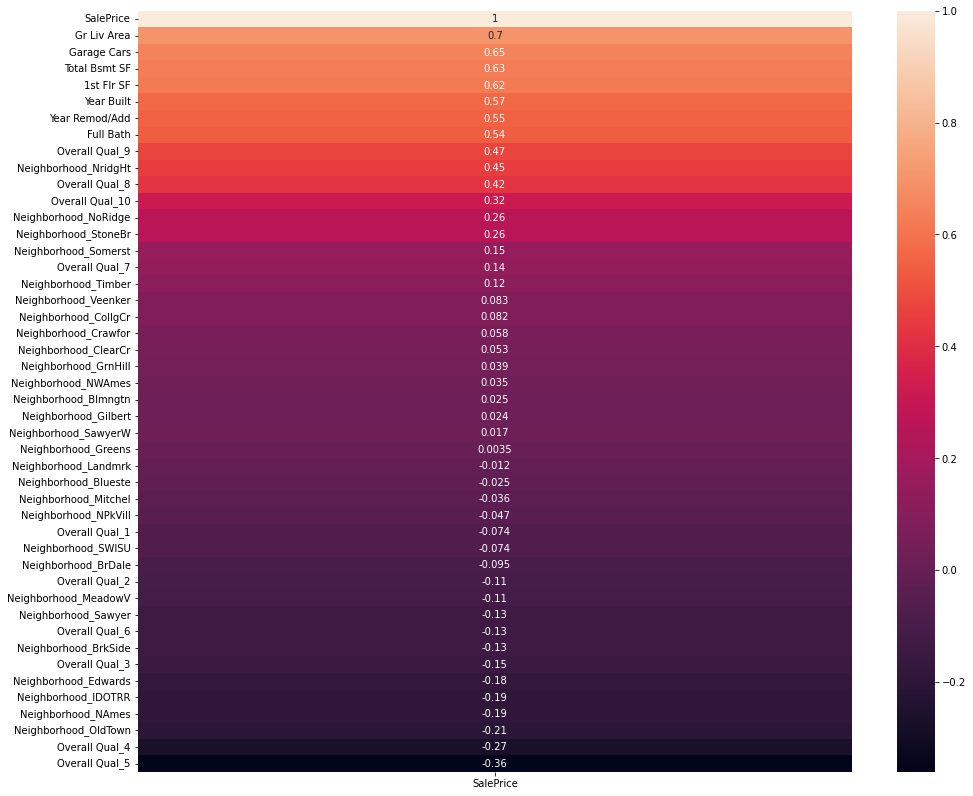

In [50]:
plt.figure(figsize=(16,14))

sns.heatmap(
    X_train_encoded.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
    annot=True
)

Looking at this correlation matrix tells me that I want to drop some categorical features from my models but I couldn't figure out how to do that.  I will follow up and figure this out after I turn in this project.